Find MPG(miles per gallon), Origin denotes a specific country

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
plt.rcParams["figure.figsize"]=[16,9]

2.0.0


In [34]:
dataset_path=keras.utils.get_file("auto-mpg.data","http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [35]:
dataset_path

'/Users/Elaine/.keras/datasets/auto-mpg.data'

In [36]:
column_names=['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']
raw_dataset=pd.read_csv(dataset_path, names=column_names, na_values="?", sep=" ", skipinitialspace=True, comment="\t")
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [37]:
dataset=raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


---
# Cleaning
---

In [38]:
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [39]:
dataset=dataset.dropna()

In [40]:
origin=dataset.pop('Origin')  #pop out the Origin and make an array
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


In [41]:
dataset['USA']=(origin==1)*1.0
dataset['Japan']=(origin==3)*1.0
dataset['Europe']=(origin==2)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Japan,Europe
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,0.0,1.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


---
# Preprocessing
---

In [42]:
train_dataset=dataset.sample(frac=0.8, random_state=0)#fraction
test_dataset=dataset.drop(train_dataset.index)
train_dataset.index

Int64Index([146, 282,  69, 378, 331, 257, 310, 328, 125, 108,
            ...
            171,  70, 307,  49, 209, 281, 229, 150, 145, 182],
           dtype='int64', length=314)

In [43]:
print(train_dataset.shape,test_dataset.shape)

(314, 10) (78, 10)


---
# EDA
---

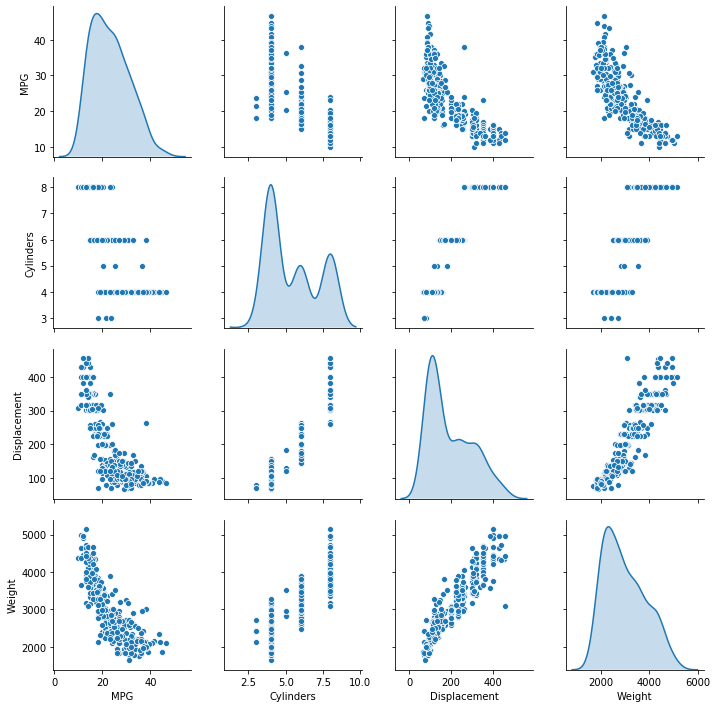

In [45]:
sns.pairplot(train_dataset[["MPG","Cylinders","Displacement","Weight"]],diag_kind="kde")

In [48]:
train_stats=train_dataset.describe()
train_stats.pop('MPG')

train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0


In [49]:
train_labels=train_dataset.pop('MPG')
test_labels=test_dataset.pop('MPG')

In [67]:
def norm(x):
    return(x-train_stats['mean'])/train_stats['std']

normed_train_data=norm(train_dataset)
normed_test_data=norm(test_dataset)
normed_test_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Japan,Europe
9,1.483887,1.865988,2.234620,1.018782,-2.530891,-1.604642,0.774676,-0.495225,-0.465148
25,1.483887,1.578444,2.890853,1.925289,-0.559020,-1.604642,0.774676,-0.495225,-0.465148
28,1.483887,1.041693,2.313368,2.063931,1.054328,-1.604642,0.774676,-0.495225,-0.465148
31,-0.869348,-0.789008,-0.259066,-0.903250,-0.559020,-1.332580,-1.286751,2.012852,-0.465148
33,0.307270,0.351586,-0.127819,-0.422150,-0.917542,-1.332580,0.774676,-0.495225,-0.465148


---
# Tensorflow
---

In [53]:
def build_model():
    model=keras.Sequential([
        layers.Dense(64,activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64,activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer=tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae','mse'])
    return model

In [54]:
model=build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [56]:
example_batch=normed_train_data[:10]
example_result=model.predict(example_batch)
example_result

array([[ 0.01134163],
       [ 0.31290737],
       [-0.32213235],
       [ 0.25791714],
       [ 0.3512298 ],
       [ 0.06009031],
       [ 0.49490574],
       [ 0.7530036 ],
       [-0.11199907],
       [ 0.27499235]], dtype=float32)

In [57]:
EPOCHS=1000
history=model.fit(normed_train_data,train_labels,epochs=EPOCHS, validation_split=0.2,verbose=1)

Train on 251 samples, validate on 63 samples
Epoch 1/1000
251/251 [==============================] - 0s 1ms/sample - loss: 559.2981 - mae: 22.4498 - mse: 559.2980 - val_loss: 543.6434 - val_mae: 22.0956 - val_mse: 543.6435
Epoch 2/1000
251/251 [==============================] - 0s 102us/sample - loss: 503.3426 - mae: 21.2188 - mse: 503.3426 - val_loss: 487.7576 - val_mae: 20.8318 - val_mse: 487.7576
Epoch 3/1000
251/251 [==============================] - 0s 109us/sample - loss: 451.4415 - mae: 19.9969 - mse: 451.4415 - val_loss: 430.1605 - val_mae: 19.4597 - val_mse: 430.1605
Epoch 4/1000
251/251 [==============================] - 0s 122us/sample - loss: 396.8334 - mae: 18.6580 - mse: 396.8334 - val_loss: 369.6084 - val_mae: 17.9030 - val_mse: 369.6084
Epoch 5/1000
251/251 [==============================] - 0s 182us/sample - loss: 338.9973 - mae: 17.1251 - mse: 338.9973 - val_loss: 305.2840 - val_mae: 16.0718 - val_mse: 305.2840
Epoch 6/1000
251/251 [==============================] - 0

Epoch 47/1000
251/251 [==============================] - 0s 135us/sample - loss: 7.4507 - mae: 1.9344 - mse: 7.4507 - val_loss: 8.9064 - val_mae: 2.2636 - val_mse: 8.9064
Epoch 48/1000
251/251 [==============================] - 0s 113us/sample - loss: 7.2043 - mae: 1.9233 - mse: 7.2043 - val_loss: 8.8834 - val_mae: 2.2755 - val_mse: 8.8834
Epoch 49/1000
251/251 [==============================] - 0s 132us/sample - loss: 7.3346 - mae: 1.9094 - mse: 7.3346 - val_loss: 8.9465 - val_mae: 2.3148 - val_mse: 8.9465
Epoch 50/1000
251/251 [==============================] - 0s 102us/sample - loss: 7.4522 - mae: 1.9257 - mse: 7.4522 - val_loss: 8.9696 - val_mae: 2.3052 - val_mse: 8.9696
Epoch 51/1000
251/251 [==============================] - 0s 106us/sample - loss: 7.0627 - mae: 1.8676 - mse: 7.0627 - val_loss: 9.0054 - val_mae: 2.2380 - val_mse: 9.0054
Epoch 52/1000
251/251 [==============================] - 0s 95us/sample - loss: 7.2215 - mae: 1.8971 - mse: 7.2215 - val_loss: 8.9025 - val_mae: 

Epoch 95/1000
251/251 [==============================] - 0s 101us/sample - loss: 6.1821 - mae: 1.7502 - mse: 6.1821 - val_loss: 8.4213 - val_mae: 2.2485 - val_mse: 8.4213
Epoch 96/1000
251/251 [==============================] - 0s 92us/sample - loss: 6.3951 - mae: 1.7750 - mse: 6.3951 - val_loss: 8.3499 - val_mae: 2.2081 - val_mse: 8.3499
Epoch 97/1000
251/251 [==============================] - 0s 97us/sample - loss: 6.1188 - mae: 1.7337 - mse: 6.1188 - val_loss: 8.6750 - val_mae: 2.1694 - val_mse: 8.6750
Epoch 98/1000
251/251 [==============================] - 0s 88us/sample - loss: 6.1571 - mae: 1.7592 - mse: 6.1571 - val_loss: 8.4117 - val_mae: 2.2231 - val_mse: 8.4117
Epoch 99/1000
251/251 [==============================] - 0s 101us/sample - loss: 6.1154 - mae: 1.7377 - mse: 6.1154 - val_loss: 8.5383 - val_mae: 2.1790 - val_mse: 8.5383
Epoch 100/1000
251/251 [==============================] - 0s 100us/sample - loss: 6.0845 - mae: 1.7444 - mse: 6.0845 - val_loss: 8.6490 - val_mae: 2

251/251 [==============================] - 0s 102us/sample - loss: 5.6067 - mae: 1.6357 - mse: 5.6067 - val_loss: 8.4517 - val_mae: 2.2473 - val_mse: 8.4517
Epoch 143/1000
251/251 [==============================] - 0s 101us/sample - loss: 5.8741 - mae: 1.6934 - mse: 5.8741 - val_loss: 8.3234 - val_mae: 2.2180 - val_mse: 8.3234
Epoch 144/1000
251/251 [==============================] - 0s 93us/sample - loss: 5.5556 - mae: 1.6310 - mse: 5.5556 - val_loss: 8.3635 - val_mae: 2.2360 - val_mse: 8.3635
Epoch 145/1000
251/251 [==============================] - 0s 98us/sample - loss: 5.5971 - mae: 1.6505 - mse: 5.5971 - val_loss: 8.2432 - val_mae: 2.2041 - val_mse: 8.2432
Epoch 146/1000
251/251 [==============================] - 0s 106us/sample - loss: 5.6967 - mae: 1.6473 - mse: 5.6967 - val_loss: 8.7149 - val_mae: 2.1810 - val_mse: 8.7149
Epoch 147/1000
251/251 [==============================] - 0s 103us/sample - loss: 5.8271 - mae: 1.6947 - mse: 5.8271 - val_loss: 8.3294 - val_mae: 2.1732 - v

251/251 [==============================] - 0s 119us/sample - loss: 5.3764 - mae: 1.6029 - mse: 5.3764 - val_loss: 8.3568 - val_mae: 2.2043 - val_mse: 8.3568
Epoch 190/1000
251/251 [==============================] - 0s 123us/sample - loss: 5.3825 - mae: 1.5871 - mse: 5.3825 - val_loss: 8.3940 - val_mae: 2.2303 - val_mse: 8.3940
Epoch 191/1000
251/251 [==============================] - 0s 115us/sample - loss: 5.3744 - mae: 1.5862 - mse: 5.3744 - val_loss: 8.3091 - val_mae: 2.2396 - val_mse: 8.3091
Epoch 192/1000
251/251 [==============================] - 0s 127us/sample - loss: 5.3827 - mae: 1.5971 - mse: 5.3827 - val_loss: 8.7096 - val_mae: 2.3118 - val_mse: 8.7096
Epoch 193/1000
251/251 [==============================] - 0s 107us/sample - loss: 5.5069 - mae: 1.6340 - mse: 5.5069 - val_loss: 8.6249 - val_mae: 2.3024 - val_mse: 8.6249
Epoch 194/1000
251/251 [==============================] - 0s 136us/sample - loss: 5.4222 - mae: 1.5996 - mse: 5.4222 - val_loss: 8.6829 - val_mae: 2.3015 -

Epoch 237/1000
251/251 [==============================] - 0s 102us/sample - loss: 5.3108 - mae: 1.5894 - mse: 5.3108 - val_loss: 8.5013 - val_mae: 2.1880 - val_mse: 8.5013
Epoch 238/1000
251/251 [==============================] - 0s 122us/sample - loss: 5.0924 - mae: 1.5328 - mse: 5.0924 - val_loss: 8.4658 - val_mae: 2.2130 - val_mse: 8.4658
Epoch 239/1000
251/251 [==============================] - 0s 134us/sample - loss: 5.3656 - mae: 1.5740 - mse: 5.3656 - val_loss: 8.4889 - val_mae: 2.2202 - val_mse: 8.4889
Epoch 240/1000
251/251 [==============================] - 0s 108us/sample - loss: 5.2019 - mae: 1.5607 - mse: 5.2019 - val_loss: 8.5560 - val_mae: 2.2638 - val_mse: 8.5560
Epoch 241/1000
251/251 [==============================] - 0s 98us/sample - loss: 5.1187 - mae: 1.5444 - mse: 5.1187 - val_loss: 8.5617 - val_mae: 2.2274 - val_mse: 8.5617
Epoch 242/1000
251/251 [==============================] - 0s 105us/sample - loss: 5.1405 - mae: 1.5626 - mse: 5.1405 - val_loss: 8.9809 - val

251/251 [==============================] - 0s 108us/sample - loss: 4.8830 - mae: 1.5072 - mse: 4.8830 - val_loss: 8.3903 - val_mae: 2.2251 - val_mse: 8.3903
Epoch 285/1000
251/251 [==============================] - 0s 121us/sample - loss: 4.8997 - mae: 1.4997 - mse: 4.8997 - val_loss: 8.6833 - val_mae: 2.2213 - val_mse: 8.6833
Epoch 286/1000
251/251 [==============================] - 0s 104us/sample - loss: 4.9135 - mae: 1.4849 - mse: 4.9135 - val_loss: 8.8343 - val_mae: 2.2870 - val_mse: 8.8343
Epoch 287/1000
251/251 [==============================] - 0s 104us/sample - loss: 5.1758 - mae: 1.5353 - mse: 5.1758 - val_loss: 8.6613 - val_mae: 2.2080 - val_mse: 8.6613
Epoch 288/1000
251/251 [==============================] - 0s 100us/sample - loss: 4.8733 - mae: 1.4985 - mse: 4.8733 - val_loss: 8.6011 - val_mae: 2.1958 - val_mse: 8.6011
Epoch 289/1000
251/251 [==============================] - 0s 100us/sample - loss: 4.9153 - mae: 1.5181 - mse: 4.9153 - val_loss: 8.5208 - val_mae: 2.2426 -

Epoch 332/1000
251/251 [==============================] - 0s 92us/sample - loss: 4.7739 - mae: 1.4785 - mse: 4.7739 - val_loss: 8.7712 - val_mae: 2.2064 - val_mse: 8.7712
Epoch 333/1000
251/251 [==============================] - 0s 116us/sample - loss: 4.6983 - mae: 1.4788 - mse: 4.6983 - val_loss: 8.8860 - val_mae: 2.2653 - val_mse: 8.8860
Epoch 334/1000
251/251 [==============================] - 0s 86us/sample - loss: 4.8217 - mae: 1.4617 - mse: 4.8217 - val_loss: 8.9058 - val_mae: 2.2393 - val_mse: 8.9058
Epoch 335/1000
251/251 [==============================] - 0s 96us/sample - loss: 4.8317 - mae: 1.5041 - mse: 4.8317 - val_loss: 8.5117 - val_mae: 2.2401 - val_mse: 8.5117
Epoch 336/1000
251/251 [==============================] - 0s 111us/sample - loss: 4.7287 - mae: 1.4857 - mse: 4.7287 - val_loss: 8.7659 - val_mae: 2.2073 - val_mse: 8.7659
Epoch 337/1000
251/251 [==============================] - 0s 100us/sample - loss: 4.6436 - mae: 1.4304 - mse: 4.6436 - val_loss: 8.9190 - val_m

Epoch 380/1000
251/251 [==============================] - 0s 109us/sample - loss: 4.4311 - mae: 1.3747 - mse: 4.4311 - val_loss: 9.1295 - val_mae: 2.2259 - val_mse: 9.1295
Epoch 381/1000
251/251 [==============================] - 0s 110us/sample - loss: 4.6121 - mae: 1.4183 - mse: 4.6121 - val_loss: 9.0909 - val_mae: 2.3216 - val_mse: 9.0909
Epoch 382/1000
251/251 [==============================] - 0s 108us/sample - loss: 4.5722 - mae: 1.4506 - mse: 4.5722 - val_loss: 9.4872 - val_mae: 2.4061 - val_mse: 9.4872
Epoch 383/1000
251/251 [==============================] - 0s 96us/sample - loss: 4.7546 - mae: 1.4624 - mse: 4.7546 - val_loss: 8.9999 - val_mae: 2.2529 - val_mse: 8.9999
Epoch 384/1000
251/251 [==============================] - 0s 95us/sample - loss: 4.5610 - mae: 1.4288 - mse: 4.5610 - val_loss: 9.0029 - val_mae: 2.2602 - val_mse: 9.0029
Epoch 385/1000
251/251 [==============================] - 0s 105us/sample - loss: 4.4593 - mae: 1.4365 - mse: 4.4593 - val_loss: 9.3685 - val_

Epoch 428/1000
251/251 [==============================] - 0s 103us/sample - loss: 4.3329 - mae: 1.3853 - mse: 4.3329 - val_loss: 9.2576 - val_mae: 2.3407 - val_mse: 9.2576
Epoch 429/1000
251/251 [==============================] - 0s 98us/sample - loss: 4.3021 - mae: 1.3667 - mse: 4.3021 - val_loss: 9.2717 - val_mae: 2.3126 - val_mse: 9.2717
Epoch 430/1000
251/251 [==============================] - 0s 114us/sample - loss: 4.4778 - mae: 1.4286 - mse: 4.4778 - val_loss: 9.5494 - val_mae: 2.3729 - val_mse: 9.5494
Epoch 431/1000
251/251 [==============================] - 0s 112us/sample - loss: 4.3319 - mae: 1.3896 - mse: 4.3319 - val_loss: 9.3159 - val_mae: 2.2866 - val_mse: 9.3159
Epoch 432/1000
251/251 [==============================] - 0s 98us/sample - loss: 4.2756 - mae: 1.3998 - mse: 4.2756 - val_loss: 9.4078 - val_mae: 2.3875 - val_mse: 9.4078
Epoch 433/1000
251/251 [==============================] - 0s 99us/sample - loss: 4.2387 - mae: 1.3568 - mse: 4.2387 - val_loss: 9.4124 - val_m

Epoch 476/1000
251/251 [==============================] - 0s 86us/sample - loss: 4.0337 - mae: 1.3515 - mse: 4.0337 - val_loss: 9.4423 - val_mae: 2.3017 - val_mse: 9.4423
Epoch 477/1000
251/251 [==============================] - 0s 108us/sample - loss: 4.2196 - mae: 1.3737 - mse: 4.2196 - val_loss: 9.0821 - val_mae: 2.2875 - val_mse: 9.0821
Epoch 478/1000
251/251 [==============================] - 0s 103us/sample - loss: 4.1426 - mae: 1.3284 - mse: 4.1426 - val_loss: 9.8216 - val_mae: 2.3052 - val_mse: 9.8216
Epoch 479/1000
251/251 [==============================] - 0s 139us/sample - loss: 4.3802 - mae: 1.3831 - mse: 4.3802 - val_loss: 9.4916 - val_mae: 2.3771 - val_mse: 9.4916
Epoch 480/1000
251/251 [==============================] - 0s 117us/sample - loss: 4.0855 - mae: 1.3383 - mse: 4.0855 - val_loss: 9.3791 - val_mae: 2.2744 - val_mse: 9.3791
Epoch 481/1000
251/251 [==============================] - 0s 111us/sample - loss: 4.1138 - mae: 1.3482 - mse: 4.1138 - val_loss: 9.3543 - val

Epoch 524/1000
251/251 [==============================] - 0s 111us/sample - loss: 3.9703 - mae: 1.3228 - mse: 3.9703 - val_loss: 9.3463 - val_mae: 2.3163 - val_mse: 9.3463
Epoch 525/1000
251/251 [==============================] - 0s 91us/sample - loss: 3.8962 - mae: 1.3371 - mse: 3.8962 - val_loss: 9.4294 - val_mae: 2.3895 - val_mse: 9.4294
Epoch 526/1000
251/251 [==============================] - 0s 86us/sample - loss: 4.0323 - mae: 1.3084 - mse: 4.0323 - val_loss: 9.3111 - val_mae: 2.3628 - val_mse: 9.3111
Epoch 527/1000
251/251 [==============================] - 0s 107us/sample - loss: 3.9000 - mae: 1.3080 - mse: 3.9000 - val_loss: 9.3825 - val_mae: 2.3992 - val_mse: 9.3825
Epoch 528/1000
251/251 [==============================] - 0s 94us/sample - loss: 3.8891 - mae: 1.2933 - mse: 3.8891 - val_loss: 9.5185 - val_mae: 2.3182 - val_mse: 9.5185
Epoch 529/1000
251/251 [==============================] - 0s 91us/sample - loss: 3.9903 - mae: 1.3048 - mse: 3.9903 - val_loss: 9.4486 - val_ma

Epoch 572/1000
251/251 [==============================] - 0s 108us/sample - loss: 3.9484 - mae: 1.2933 - mse: 3.9484 - val_loss: 9.7243 - val_mae: 2.3954 - val_mse: 9.7243
Epoch 573/1000
251/251 [==============================] - 0s 99us/sample - loss: 3.6872 - mae: 1.2725 - mse: 3.6872 - val_loss: 9.7535 - val_mae: 2.3406 - val_mse: 9.7535
Epoch 574/1000
251/251 [==============================] - 0s 83us/sample - loss: 3.8477 - mae: 1.3069 - mse: 3.8477 - val_loss: 9.5169 - val_mae: 2.3537 - val_mse: 9.5169
Epoch 575/1000
251/251 [==============================] - 0s 114us/sample - loss: 3.6927 - mae: 1.2755 - mse: 3.6927 - val_loss: 9.7186 - val_mae: 2.3964 - val_mse: 9.7186
Epoch 576/1000
251/251 [==============================] - 0s 113us/sample - loss: 3.6829 - mae: 1.2431 - mse: 3.6829 - val_loss: 10.1163 - val_mae: 2.4793 - val_mse: 10.1163
Epoch 577/1000
251/251 [==============================] - 0s 115us/sample - loss: 3.9363 - mae: 1.2810 - mse: 3.9363 - val_loss: 10.1654 - v

251/251 [==============================] - 0s 90us/sample - loss: 3.5393 - mae: 1.2198 - mse: 3.5393 - val_loss: 10.9105 - val_mae: 2.3831 - val_mse: 10.9105
Epoch 620/1000
251/251 [==============================] - 0s 104us/sample - loss: 3.8221 - mae: 1.3019 - mse: 3.8221 - val_loss: 9.6335 - val_mae: 2.3481 - val_mse: 9.6335
Epoch 621/1000
251/251 [==============================] - 0s 114us/sample - loss: 3.4611 - mae: 1.2221 - mse: 3.4611 - val_loss: 9.7712 - val_mae: 2.3814 - val_mse: 9.7712
Epoch 622/1000
251/251 [==============================] - 0s 93us/sample - loss: 3.5830 - mae: 1.2276 - mse: 3.5830 - val_loss: 10.0521 - val_mae: 2.4053 - val_mse: 10.0521
Epoch 623/1000
251/251 [==============================] - 0s 101us/sample - loss: 3.5847 - mae: 1.2338 - mse: 3.5847 - val_loss: 9.9235 - val_mae: 2.3864 - val_mse: 9.9235
Epoch 624/1000
251/251 [==============================] - 0s 98us/sample - loss: 3.8916 - mae: 1.2819 - mse: 3.8916 - val_loss: 9.7609 - val_mae: 2.3793 

251/251 [==============================] - 0s 95us/sample - loss: 3.6882 - mae: 1.2750 - mse: 3.6882 - val_loss: 10.0649 - val_mae: 2.3265 - val_mse: 10.0649
Epoch 667/1000
251/251 [==============================] - 0s 86us/sample - loss: 3.4687 - mae: 1.2069 - mse: 3.4687 - val_loss: 10.1074 - val_mae: 2.4089 - val_mse: 10.1074
Epoch 668/1000
251/251 [==============================] - 0s 101us/sample - loss: 3.2642 - mae: 1.1713 - mse: 3.2642 - val_loss: 10.2331 - val_mae: 2.3976 - val_mse: 10.2331
Epoch 669/1000
251/251 [==============================] - 0s 104us/sample - loss: 3.1757 - mae: 1.1727 - mse: 3.1757 - val_loss: 9.6348 - val_mae: 2.4447 - val_mse: 9.6348
Epoch 670/1000
251/251 [==============================] - 0s 100us/sample - loss: 3.5926 - mae: 1.1970 - mse: 3.5926 - val_loss: 10.4900 - val_mae: 2.3836 - val_mse: 10.4900
Epoch 671/1000
251/251 [==============================] - 0s 107us/sample - loss: 3.4194 - mae: 1.2284 - mse: 3.4194 - val_loss: 9.9317 - val_mae: 2.

251/251 [==============================] - 0s 88us/sample - loss: 3.3357 - mae: 1.1725 - mse: 3.3357 - val_loss: 10.5806 - val_mae: 2.6160 - val_mse: 10.5806
Epoch 714/1000
251/251 [==============================] - 0s 117us/sample - loss: 3.3815 - mae: 1.1746 - mse: 3.3815 - val_loss: 10.2681 - val_mae: 2.5063 - val_mse: 10.2681
Epoch 715/1000
251/251 [==============================] - 0s 98us/sample - loss: 3.2673 - mae: 1.1742 - mse: 3.2673 - val_loss: 10.0276 - val_mae: 2.3467 - val_mse: 10.0276
Epoch 716/1000
251/251 [==============================] - 0s 110us/sample - loss: 3.0707 - mae: 1.1641 - mse: 3.0707 - val_loss: 10.5304 - val_mae: 2.5744 - val_mse: 10.5304
Epoch 717/1000
251/251 [==============================] - 0s 103us/sample - loss: 3.4550 - mae: 1.2042 - mse: 3.4550 - val_loss: 10.0989 - val_mae: 2.5048 - val_mse: 10.0989
Epoch 718/1000
251/251 [==============================] - 0s 97us/sample - loss: 3.1405 - mae: 1.1328 - mse: 3.1405 - val_loss: 10.2413 - val_mae: 

251/251 [==============================] - 0s 98us/sample - loss: 3.1808 - mae: 1.1439 - mse: 3.1808 - val_loss: 10.5372 - val_mae: 2.4573 - val_mse: 10.5372
Epoch 761/1000
251/251 [==============================] - 0s 99us/sample - loss: 2.9629 - mae: 1.1170 - mse: 2.9629 - val_loss: 10.3409 - val_mae: 2.4229 - val_mse: 10.3409
Epoch 762/1000
251/251 [==============================] - 0s 115us/sample - loss: 3.1382 - mae: 1.1606 - mse: 3.1382 - val_loss: 10.5761 - val_mae: 2.5078 - val_mse: 10.5761
Epoch 763/1000
251/251 [==============================] - 0s 102us/sample - loss: 3.0815 - mae: 1.1271 - mse: 3.0815 - val_loss: 10.3236 - val_mae: 2.3938 - val_mse: 10.3236
Epoch 764/1000
251/251 [==============================] - 0s 90us/sample - loss: 3.2880 - mae: 1.1636 - mse: 3.2880 - val_loss: 10.8795 - val_mae: 2.4473 - val_mse: 10.8795
Epoch 765/1000
251/251 [==============================] - 0s 103us/sample - loss: 3.0046 - mae: 1.1349 - mse: 3.0046 - val_loss: 10.5532 - val_mae: 

251/251 [==============================] - 0s 114us/sample - loss: 2.9651 - mae: 1.0892 - mse: 2.9651 - val_loss: 10.7437 - val_mae: 2.4672 - val_mse: 10.7437
Epoch 808/1000
251/251 [==============================] - 0s 103us/sample - loss: 3.0706 - mae: 1.1233 - mse: 3.0706 - val_loss: 10.5979 - val_mae: 2.5372 - val_mse: 10.5979
Epoch 809/1000
251/251 [==============================] - 0s 105us/sample - loss: 2.9493 - mae: 1.0928 - mse: 2.9493 - val_loss: 10.8211 - val_mae: 2.5225 - val_mse: 10.8211
Epoch 810/1000
251/251 [==============================] - 0s 92us/sample - loss: 2.8777 - mae: 1.0911 - mse: 2.8777 - val_loss: 10.5064 - val_mae: 2.5191 - val_mse: 10.5064
Epoch 811/1000
251/251 [==============================] - 0s 96us/sample - loss: 2.9591 - mae: 1.1164 - mse: 2.9591 - val_loss: 10.4495 - val_mae: 2.4306 - val_mse: 10.4495
Epoch 812/1000
251/251 [==============================] - 0s 95us/sample - loss: 2.8668 - mae: 1.0986 - mse: 2.8668 - val_loss: 11.6527 - val_mae: 

251/251 [==============================] - 0s 90us/sample - loss: 3.0373 - mae: 1.1398 - mse: 3.0373 - val_loss: 10.7010 - val_mae: 2.5326 - val_mse: 10.7010
Epoch 855/1000
251/251 [==============================] - 0s 105us/sample - loss: 2.7638 - mae: 1.0666 - mse: 2.7638 - val_loss: 10.3686 - val_mae: 2.5209 - val_mse: 10.3686
Epoch 856/1000
251/251 [==============================] - 0s 95us/sample - loss: 2.9966 - mae: 1.0958 - mse: 2.9966 - val_loss: 10.6212 - val_mae: 2.5161 - val_mse: 10.6212
Epoch 857/1000
251/251 [==============================] - 0s 105us/sample - loss: 2.7758 - mae: 1.0477 - mse: 2.7758 - val_loss: 10.7525 - val_mae: 2.5753 - val_mse: 10.7525
Epoch 858/1000
251/251 [==============================] - 0s 94us/sample - loss: 2.8295 - mae: 1.0662 - mse: 2.8295 - val_loss: 10.6821 - val_mae: 2.5575 - val_mse: 10.6821
Epoch 859/1000
251/251 [==============================] - 0s 105us/sample - loss: 2.8361 - mae: 1.0896 - mse: 2.8361 - val_loss: 10.5487 - val_mae: 

251/251 [==============================] - 0s 96us/sample - loss: 2.6266 - mae: 1.0138 - mse: 2.6266 - val_loss: 11.3229 - val_mae: 2.4792 - val_mse: 11.3229
Epoch 902/1000
251/251 [==============================] - 0s 93us/sample - loss: 2.7147 - mae: 1.0638 - mse: 2.7147 - val_loss: 11.1487 - val_mae: 2.6057 - val_mse: 11.1487
Epoch 903/1000
251/251 [==============================] - 0s 104us/sample - loss: 2.6068 - mae: 0.9980 - mse: 2.6068 - val_loss: 11.9266 - val_mae: 2.5194 - val_mse: 11.9266
Epoch 904/1000
251/251 [==============================] - 0s 88us/sample - loss: 2.7712 - mae: 1.0667 - mse: 2.7712 - val_loss: 12.2285 - val_mae: 2.6241 - val_mse: 12.2285
Epoch 905/1000
251/251 [==============================] - 0s 104us/sample - loss: 2.7090 - mae: 1.0670 - mse: 2.7090 - val_loss: 10.8105 - val_mae: 2.5318 - val_mse: 10.8105
Epoch 906/1000
251/251 [==============================] - 0s 100us/sample - loss: 2.6101 - mae: 1.0309 - mse: 2.6101 - val_loss: 11.6454 - val_mae: 

251/251 [==============================] - 0s 128us/sample - loss: 2.5911 - mae: 0.9871 - mse: 2.5911 - val_loss: 11.3391 - val_mae: 2.5909 - val_mse: 11.3391
Epoch 949/1000
251/251 [==============================] - 0s 131us/sample - loss: 2.3928 - mae: 0.9873 - mse: 2.3928 - val_loss: 11.3352 - val_mae: 2.6583 - val_mse: 11.3352
Epoch 950/1000
251/251 [==============================] - 0s 149us/sample - loss: 2.5119 - mae: 1.0250 - mse: 2.5119 - val_loss: 10.9130 - val_mae: 2.6032 - val_mse: 10.9130
Epoch 951/1000
251/251 [==============================] - 0s 153us/sample - loss: 2.5242 - mae: 1.0311 - mse: 2.5242 - val_loss: 11.1528 - val_mae: 2.4639 - val_mse: 11.1528
Epoch 952/1000
251/251 [==============================] - 0s 118us/sample - loss: 2.6414 - mae: 1.0187 - mse: 2.6414 - val_loss: 11.1739 - val_mae: 2.4573 - val_mse: 11.1739
Epoch 953/1000
251/251 [==============================] - 0s 124us/sample - loss: 2.5753 - mae: 0.9951 - mse: 2.5753 - val_loss: 11.8504 - val_ma

251/251 [==============================] - 0s 93us/sample - loss: 2.3789 - mae: 0.9828 - mse: 2.3789 - val_loss: 11.3897 - val_mae: 2.4747 - val_mse: 11.3897
Epoch 996/1000
251/251 [==============================] - 0s 101us/sample - loss: 2.4132 - mae: 0.9803 - mse: 2.4132 - val_loss: 11.4440 - val_mae: 2.6206 - val_mse: 11.4440
Epoch 997/1000
251/251 [==============================] - 0s 107us/sample - loss: 2.4548 - mae: 0.9647 - mse: 2.4548 - val_loss: 11.2367 - val_mae: 2.5069 - val_mse: 11.2367
Epoch 998/1000
251/251 [==============================] - 0s 99us/sample - loss: 2.4307 - mae: 0.9803 - mse: 2.4307 - val_loss: 11.2851 - val_mae: 2.6043 - val_mse: 11.2851
Epoch 999/1000
251/251 [==============================] - 0s 99us/sample - loss: 2.4543 - mae: 0.9817 - mse: 2.4543 - val_loss: 11.1605 - val_mae: 2.6577 - val_mse: 11.1605
Epoch 1000/1000
251/251 [==============================] - 0s 103us/sample - loss: 2.3966 - mae: 0.9799 - mse: 2.3966 - val_loss: 11.5841 - val_mae:

In [59]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.413156,0.980270,2.413156,11.443952,2.620572,11.443953,995
996,2.454774,0.964662,2.454774,11.236660,2.506921,11.236660,996
997,2.430688,0.980331,2.430688,11.285051,2.604339,11.285051,997
998,2.454262,0.981739,2.454262,11.160503,2.657701,11.160503,998
999,2.396605,0.979877,2.396605,11.584126,2.631389,11.584126,999


In [60]:
#plt

In [64]:
test_predictions=model.predict(normed_test_data)
test_predictions= test_predictions.flatten()   #flatten makes 2D to 1D
test_predictions
# plt

array([15.586845 ,  7.6832895, 11.546379 , 25.367352 , 19.136868 ,
       11.834279 , 12.76141  , 10.917662 , 20.39591  , 29.969614 ,
       22.718168 , 19.186428 , 14.249978 , 27.412975 , 12.858157 ,
       14.610958 , 13.386586 , 13.297849 , 18.447933 , 13.220682 ,
       15.18858  , 25.0502   , 17.843636 , 18.920572 , 26.81647  ,
       22.433077 , 16.406029 , 21.603115 , 18.066292 , 16.497507 ,
       23.90331  , 24.32304  , 18.275043 , 19.656898 , 25.715847 ,
       15.74307  , 18.561579 , 33.454628 , 29.039389 , 18.187063 ,
       28.849316 , 26.074558 , 13.349267 , 37.870834 , 36.792095 ,
       37.20159  , 20.361717 , 21.30066  , 20.270075 , 23.830215 ,
       31.576588 , 16.29365  , 32.245068 , 19.656965 , 18.43735  ,
       18.769032 , 35.032864 , 35.495075 , 23.42448  , 24.81603  ,
       40.862865 , 33.953392 , 27.067474 , 25.229025 , 33.30949  ,
       38.831917 , 36.804703 , 36.6642   , 39.178417 , 30.845404 ,
       22.84118  , 28.440796 , 30.749685 , 30.37519  , 40.32  

In [65]:
new_sample=normed_test_data.iloc[0].tolist()  #new_sample is an array
model.predict([new_sample]).flatten()[0]

15.586843

In [66]:
test_labels.iloc[0]

15.0